In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
def get_report(model, X_test, y_true):
    y_pred = model.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

# Dataset

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# AdaBoost
Гиперпараметры:

- base_estimators: указывает оценщик базового типа, то есть алгоритм, который будет использоваться в качестве слабого ученика. По умолчанию = DecisionTreeClassifier(max_depth = 1) - decision stump (пень).  
- n_estimators: максимальное количество оценщиков, при котором бустинг прекращается. По умолчанию = 50  
- learning_rate: скорость обучения уменьшает вклад каждого классификатора на learning_rate. Существует компромисс между learning_rate и n_estimators. по умолчанию = 1.  
- random_state: делает вывод модели воспроизводимым. по умолчанию = None  
- loss: только для регрессора. Функция потерь используется при обновлении весов после каждой итерации бустинга. {‘Linear’, ‘square’, ‘exponential’}, по умолчанию = ’linear’  
- algorithm: SAMME.R сходится быстрее, но надо, чтоб слабые ученики имели метод predict_proba

In [4]:
RANDOM_STATE = 42

In [5]:
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=RANDOM_STATE)
model = ada_clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        11
           1     0.8571    0.9231    0.8889        13
           2     0.9231    0.8571    0.8889        14

    accuracy                         0.9211        38
   macro avg     0.9267    0.9267    0.9259        38
weighted avg     0.9228    0.9211    0.9211        38



In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
ada_clf.feature_importances_

array([0.  , 0.  , 0.48, 0.52])

Можем попробовать использовать другие base learners.

In [9]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4), 
    n_estimators=25, 
    learning_rate=0.1,
    random_state=RANDOM_STATE)
ada_clf.fit(X_train, y_train)

get_report(ada_clf, X_train, y_train)
get_report(ada_clf, X_test, y_test)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        39
           1     1.0000    1.0000    1.0000        37
           2     1.0000    1.0000    1.0000        36

    accuracy                         1.0000       112
   macro avg     1.0000    1.0000    1.0000       112
weighted avg     1.0000    1.0000    1.0000       112

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        11
           1     0.9167    0.8462    0.8800        13
           2     0.8667    0.9286    0.8966        14

    accuracy                         0.9211        38
   macro avg     0.9278    0.9249    0.9255        38
weighted avg     0.9224    0.9211    0.9208        38



In [10]:
ada_clf.feature_importances_

array([0.        , 0.        , 0.05427136, 0.94572864])

In [11]:
from sklearn.svm import SVC

svc = SVC(probability=True, kernel='linear')
ada_clf = AdaBoostClassifier(svc, n_estimators=50)
ada_clf.fit(X_train, y_train)

get_report(ada_clf, X_train, y_train)
get_report(ada_clf, X_test, y_test)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        39
           1     1.0000    1.0000    1.0000        37
           2     1.0000    1.0000    1.0000        36

    accuracy                         1.0000       112
   macro avg     1.0000    1.0000    1.0000       112
weighted avg     1.0000    1.0000    1.0000       112

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        11
           1     0.9167    0.8462    0.8800        13
           2     0.8667    0.9286    0.8966        14

    accuracy                         0.9211        38
   macro avg     0.9278    0.9249    0.9255        38
weighted avg     0.9224    0.9211    0.9208        38



# Gradient Boosting
Вместо обновления весов обучающих экземпляров, как в AdaBoost, Gradient Boosting подгоняет новую модель к остаточным ошибкам.

Гиперпараметры:
- loss: {‘deviance’, ‘exponential’}, default = ’deviance’ Функция потерь для оптимизации. «deviance» означает отклонение (= логистическая регрессия) для классификации с вероятностными выходными данными. Для потери «экспоненциального» повышения градиента восстанавливает алгоритм AdaBoost.
- learning_rate: float, по умолчанию = 0.1, уменьшает вклад каждого дерева на learning_rate. Существует компромисс между learning_rate и n_estimators.
- n_estimators: int, default = 100 Количество выполняемых этапов повышения. Повышение градиента довольно устойчиво к переобучению, поэтому большое количество обычно приводит к лучшей производительности.
- subsample: float, default = 1.0 Доля выборки, которая будет использоваться для подбора отдельных слабых учеников.
- criterion: {‘friedman_mse’, ‘mse’, ‘mae’}, default = ’friedman_mse’ Функция для измерения качества разделения.
- min_samples_split: int или float, по умолчанию = 2 Минимальное количество выборок, необходимых для разделения внутреннего узла.
Если int, то считайте min_samples_split минимальным числом.  
Если float, то min_samples_split - это дробная часть, а ceil(min_samples_split * n_samples) - минимальное количество выборок для каждого разделения.  
- min_samples_leaf: int или float, по умолчанию = 1 Минимальное количество выборок, которое требуется для конечного узла.
- max_depth: int, по умолчанию = 3 максимальная глубина индивидуальных оценок регрессии.
- min_impurity_decrease: float, default = 0.0 Узел будет разделен, если это разделение вызовет уменьшение примеси больше или равное этому значению.
- init: estimator или «zero», по умолчанию = None. Объект оценщика, который используется для вычисления начальных прогнозов. init должен предоставлять fit и pred_proba. Если «zero», исходные необработанные прогнозы устанавливаются на ноль. По умолчанию используется DummyEstimator, предсказывающий априорные значения классов.
- max_features: {‘auto’, ‘sqrt’, ‘log2’}, int или float, default = None Число признаков, которые следует учитывать при поиске наилучшего разделения:
Если int, то учитывайте особенности max_features при каждом разбиении.   
Если float, то max_features является дробной частью, а функции int (max_features * n_features) учитываются при каждом разбиении.  
Если «авто», то max_features = sqrt(n_features).  
Если «sqrt», то max_features = sqrt(n_features).  
Если «log2», то max_features = log2(n_features).  
Если None, то max_features = n_features.  
Выбор max_features < n_features приводит к уменьшению дисперсии и увеличению смещения сильного ученика.  

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [14]:
gb_clf = GradientBoostingClassifier(
    n_estimators=10,
    random_state=RANDOM_STATE)
gb_clf.fit(X_train, y_train)

get_report(gb_clf, X_train, y_train)
get_report(gb_clf, X_test, y_test)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        39
           1     1.0000    1.0000    1.0000        37
           2     1.0000    1.0000    1.0000        36

    accuracy                         1.0000       112
   macro avg     1.0000    1.0000    1.0000       112
weighted avg     1.0000    1.0000    1.0000       112

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        11
           1     0.9167    0.8462    0.8800        13
           2     0.8667    0.9286    0.8966        14

    accuracy                         0.9211        38
   macro avg     0.9278    0.9249    0.9255        38
weighted avg     0.9224    0.9211    0.9208        38



# XGBoost

Рекомендованный способ устанаваливать xgboost:

In [15]:
!conda install -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



При установке через pip xgboost может убивать ноутбук при запуске тренировки.

In [16]:
from xgboost import XGBClassifier

In [17]:
xgb_clf = XGBClassifier(max_depth=3,
                        n_estimators=10,
                        use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

get_report(xgb_clf, X_test, y_test)

[22:36:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        11
           1     0.9167    0.8462    0.8800        13
           2     0.8667    0.9286    0.8966        14

    accuracy                         0.9211        38
   macro avg     0.9278    0.9249    0.9255        38
weighted avg     0.9224    0.9211    0.9208        38



In [18]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

# CatBoost

Запустим на том же наборе данных, чтоб посмотреть, как в базовом варианте работает catboost.

In [19]:
from catboost import CatBoostClassifier

In [20]:
cb = CatBoostClassifier(iterations=2,
                          learning_rate=1,
                          depth=2)
cb.fit(X_train, y_train)

get_report(cb, X_test, y_test)

0:	learn: 0.4565511	total: 49.9ms	remaining: 49.9ms
1:	learn: 0.2708126	total: 50.5ms	remaining: 0us
              precision    recall  f1-score   support

           0     1.0000    0.9091    0.9524        11
           1     0.8000    0.9231    0.8571        13
           2     0.9231    0.8571    0.8889        14

    accuracy                         0.8947        38
   macro avg     0.9077    0.8964    0.8995        38
weighted avg     0.9032    0.8947    0.8964        38



Загрузим титаник, чтоб поработать с более "реальными" данными и посмотреть на функционал catboost.

In [21]:
from catboost.datasets import titanic
import numpy as np

train_df, test_df = titanic()

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
train_df.shape

(891, 12)

In [23]:
train_df.Name.nunique()

891

## Подготовка признаков
Проверим наличие отсутствующих переменных:

In [24]:
null_value_stats = train_df.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

Заполним отсутствующие значения в **`Age`**, **`Cabin`** и **`Embarked`** значением вне распределения данных, чтоб модель легко могла легко отличить эти значения от "нормальных":

In [25]:
train_df.fillna(-999, inplace=True)
test_df.fillna(-999, inplace=True)

In [26]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-999,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-999,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-999,S


Выделяем признаки и целевую переменную:

In [27]:
X = train_df.drop('Survived', axis=1)
y = train_df.Survived

Наши признаки - разных типов (числовые, категориальные, строки, которые обычно должны обрабатываться определенным образом (например, кодированием с помощью представления bag of words)). Но в нашем случае мы могли бы рассматривать эти строчные признаки как категоричные - вся тяжелая работа выполняется внутри CatBoost!

In [28]:
print(X.dtypes)

categorical_features_indices = np.where(X.dtypes != np.float64)[0]

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [29]:
X.columns.shape

(11,)

In [30]:
categorical_features_indices

array([ 0,  1,  2,  3,  5,  6,  7,  9, 10])

Разделяем данные на трен. и тест.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=RANDOM_STATE)

X_test = test_df

## База catboost

Необходимые импорты.

In [32]:
from catboost import CatBoostClassifier, Pool, metrics, cv
import catboost
from sklearn.metrics import accuracy_score

### Тренировка модели
Создадим саму модель. Мы пойдем сюда с параметрами по умолчанию, поскольку они почти всегда обеспечивают действительно хорошую основу. Единственное, что мы хотели бы указать здесь, это параметр custom_loss, так как это даст нам возможность видеть, что происходит с точки зрения этой метрики качества модели - точности, а также иметь возможность отслеживать лог-потери, как это было бы быть более плавным на наборе данных такого размера.

In [33]:
model = CatBoostClassifier(
    custom_loss=[catboost.metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent'
)

In [34]:
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  # если раскомменируем, будет больше логов
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Логи по факту не нужны (есть график), но график не сохраняется, лучше его ещё отдельно заплотить матплотлибом. График катбуста выделяет также лучшую итерацию с точки зрения целевой метрики на валидационном наборе данных.  
На графике можем переключаться между метриками. Видим, что лучшая точность - на 150 итерации 0.829.

Для логов можно поставить `verbose=200`, тогда будет принтиться только каждая 200ая итерация.

Посмотрим, что внутри модели.

In [35]:
vars(model)

{'_init_params': {'random_seed': 42,
  'logging_level': 'Silent',
  'custom_loss': ['Accuracy']},
 '_object': <_catboost._CatBoost at 0x1801f07c0>,
 '_is_fitted_': True,
 '_random_seed': 42,
 '_learning_rate': 0.028682999312877655,
 '_tree_count': 344,
 '_n_features_in': 11,
 '_prediction_values_change': [0.0,
  17.05148508476817,
  0.0,
  26.414280626854776,
  10.048601966528931,
  7.7453349687619255,
  10.353779233548105,
  5.765308612507676,
  5.797149420756516,
  7.919648988938338,
  8.904411097335606]}

In [36]:
model.get_evals_result()['learn'].keys()

dict_keys(['Accuracy', 'Logloss'])

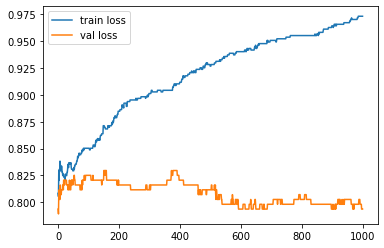

In [37]:
plt.plot(model.get_evals_result()['learn']['Accuracy'], label='train loss')
plt.plot(model.get_evals_result()['validation']['Accuracy'], label='val loss')
plt.legend()
plt.show()

### Кросс-валидация

In [38]:
cv_params = model.get_params()

In [39]:
cv_params

{'random_seed': 42, 'logging_level': 'Silent', 'custom_loss': ['Accuracy']}

In [40]:
cv_params.update({
    'loss_function': metrics.Logloss()
})

In [41]:
cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Теперь у нас есть значения наших функций потерь на каждом шаге бустинга, усредненные по 3ём фолдам, что должно дать нам более точную оценку производительности нашей модели:

In [42]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))

Best validation accuracy score: 0.83±0.02 on step 355


In [43]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

Precise validation accuracy score: 0.8294051627384961


In [44]:
# vars(cv_data)

### Применение модели


In [45]:
predictions = model.predict(X_test)
predictions_probs = model.predict_proba(X_test)
print(predictions[:10])
print(predictions_probs[:10])

[0 0 0 0 1 0 1 0 1 0]
[[0.85473931 0.14526069]
 [0.76313031 0.23686969]
 [0.88972889 0.11027111]
 [0.87876173 0.12123827]
 [0.3611047  0.6388953 ]
 [0.90513381 0.09486619]
 [0.33434185 0.66565815]
 [0.78468564 0.21531436]
 [0.39429048 0.60570952]
 [0.94047549 0.05952451]]


##  Фишки CatBoost и некоторые из параметров модели

Определим некоторые параметры и создадим `Pool` для удобства. Он хранит всю информацию о наборе данных (функции, метки, индексы категориальных функций, веса и многое другое).

In [46]:
params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': metrics.Accuracy(),
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False
}
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validate_pool = Pool(X_validation, y_validation, cat_features=categorical_features_indices)

### Best model
Если у вас есть валидационный набор данных, всегда лучше использовать параметр use_best_model во время обучения. По умолчанию этот параметр включен. Если он включен, результирующий ансамбль деревьев сжимается до наилучшей итерации в конце.

In [47]:
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)

best_model_params = params.copy()
best_model_params.update({
    'use_best_model': True
})
best_model = CatBoostClassifier(**best_model_params)
best_model.fit(train_pool, eval_set=validate_pool);

print('Simple model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, model.predict(X_validation))
))
print('')

print('Best model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, best_model.predict(X_validation))
))

Simple model validation accuracy: 0.7982

Best model validation accuracy: 0.8251


### Early Stopping
Если у вас есть валидационный набор данных, для упрощения и ускорения обучения рекомендуется использовать раннюю остановку. Эта функция похожа на предыдущую, но только помимо улучшения качества она еще экономит время.

In [48]:
params

{'iterations': 500,
 'learning_rate': 0.1,
 'eval_metric': Accuracy(type='Classic' [mandatory=False], use_weights=True [mandatory=False]),
 'random_seed': 42,
 'logging_level': 'Silent',
 'use_best_model': False}

In [49]:
%%time
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)

CPU times: user 8.92 s, sys: 467 ms, total: 9.38 s
Wall time: 1.34 s


od_type = overfitting detector

In [50]:
%%time
earlystop_params = params.copy()
earlystop_params.update({
    'od_type': 'Iter',
    'od_wait': 40
})
earlystop_model = CatBoostClassifier(**earlystop_params)
earlystop_model.fit(train_pool, eval_set=validate_pool);

CPU times: user 1.45 s, sys: 120 ms, total: 1.57 s
Wall time: 231 ms


In [51]:
print('Simple model tree count: {}'.format(model.tree_count_))
print('Simple model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, model.predict(X_validation))
))
print('')

print('Early-stopped model tree count: {}'.format(earlystop_model.tree_count_))
print('Early-stopped model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, earlystop_model.predict(X_validation))
))

Simple model tree count: 500
Simple model validation accuracy: 0.7982

Early-stopped model tree count: 82
Early-stopped model validation accuracy: 0.8072


Получили лучше точность за меньшее время.

### Использование бейзлайна
Можно использовать результаты предварительной тренировки (базовой) для тренировки.

In [52]:
current_params = params.copy()
current_params.update({
    'iterations': 10
})
model = CatBoostClassifier(**current_params).fit(X_train, y_train, categorical_features_indices)
# Получаем бейзлайн (только с prediction_type='RawFormulaVal')
baseline = model.predict(X_train, prediction_type='RawFormulaVal')
# Тренируем новую модель
model.fit(X_train, y_train, categorical_features_indices, baseline=baseline);

RawFormulaVal от функции прогнозирования catboost с типом `RawFormulaVal` - это логарифмические шансы (https://en.wikipedia.org/wiki/Logit).  
Если мы применим функцию `exp(score) / (1+exp (score))`, мы получим вероятности, как если бы мы использовали формулу прогнозирования с типом `Probabilities`.

In [53]:
model.predict(X_train, prediction_type='RawFormulaVal')[:10]

array([-0.06263344, -0.52597119,  0.47447896, -0.52597119, -0.07454153,
        0.41694323,  0.07052511, -0.45238619,  0.46479974, -0.47320064])

### Поддержка Snapshot
Catboost поддерживает снапшоты. Вы можете использовать их для сохранения промежуточных результатов, восстановления тренировки после перерыва или для начала тренировки с предыдущими результатами.

In [61]:
params_with_snapshot = params.copy()
params_with_snapshot.update({
    'iterations': 5,
    'learning_rate': 0.5,
    'logging_level': 'Verbose'
})
model = CatBoostClassifier(**params_with_snapshot).fit(train_pool, eval_set=validate_pool, save_snapshot=True)


bestTest = 0.8116591928
bestIteration = 4



In [60]:
params_with_snapshot.update({
    'iterations': 10,
    'learning_rate': 0.1,
})
model = CatBoostClassifier(**params_with_snapshot).fit(train_pool, eval_set=validate_pool, save_snapshot=True)

0:	learn: 0.8053892	test: 0.7937220	best: 0.7937220 (0)	total: 1.25ms	remaining: 11.2ms
1:	learn: 0.8038922	test: 0.7982063	best: 0.7982063 (1)	total: 3.09ms	remaining: 12.4ms
2:	learn: 0.8023952	test: 0.8026906	best: 0.8026906 (2)	total: 3.96ms	remaining: 9.25ms
3:	learn: 0.8038922	test: 0.8026906	best: 0.8026906 (2)	total: 4.86ms	remaining: 7.29ms
4:	learn: 0.8083832	test: 0.8116592	best: 0.8116592 (4)	total: 6.18ms	remaining: 6.18ms
5:	learn: 0.8158683	test: 0.8026906	best: 0.8116592 (4)	total: 7.64ms	remaining: 5.09ms
6:	learn: 0.8113772	test: 0.8116592	best: 0.8116592 (4)	total: 8.64ms	remaining: 3.7ms
7:	learn: 0.8158683	test: 0.8026906	best: 0.8116592 (4)	total: 9.9ms	remaining: 2.47ms
8:	learn: 0.8173653	test: 0.7982063	best: 0.8116592 (4)	total: 10.7ms	remaining: 1.19ms
9:	learn: 0.8158683	test: 0.8071749	best: 0.8116592 (4)	total: 11.9ms	remaining: 0us

bestTest = 0.8116591928
bestIteration = 4



Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Можем также использовать `snapshot_file` для указания файла для сохранения снапшота, `snapshot_interval` - интервал в секундах между сохранениями снапшотов.

### Пользовательская функция потерь (Objective Function)
Создадим свою logloss функцию.

In [62]:
class LoglossObjective(object):
    def calc_ders_range(self, approxes, targets, weights):
        # approxes, targets, weights are indexed containers of floats
        # (containers which have only __len__ and __getitem__ defined).
        # weights parameter can be None.
        #
        # To understand what these parameters mean, assume that there is
        # a subset of your dataset that is currently being processed.
        # approxes contains current predictions for this subset,
        # targets contains target values you provided with the dataset.
        #
        # This function should return a list of pairs (der1, der2), where
        # der1 is the first derivative of the loss function with respect
        # to the predicted value, and der2 is the second derivative.
        #
        # In our case, logloss is defined by the following formula:
        # target * log(sigmoid(approx)) + (1 - target) * (1 - sigmoid(approx))
        # where sigmoid(x) = 1 / (1 + e^(-x)).
        
        assert len(approxes) == len(targets)
        if weights is not None:
            assert len(weights) == len(approxes)
        
        result = []
        for index in range(len(targets)):
            e = np.exp(approxes[index])
            p = e / (1 + e)
            der1 = (1 - p) if targets[index] > 0.0 else -p
            der2 = -p * (1 - p)

            if weights is not None:
                der1 *= weights[index]
                der2 *= weights[index]

            result.append((der1, der2))
        return result

In [63]:
model = CatBoostClassifier(
    iterations=10,
    random_seed=42, 
    loss_function=LoglossObjective(), 
    eval_metric=metrics.Logloss()
)
model.fit(train_pool)

preds_raw = model.predict(X_test)

0:	learn: 0.6827074	total: 17.1ms	remaining: 154ms
1:	learn: 0.6723302	total: 34.1ms	remaining: 136ms
2:	learn: 0.6619449	total: 51.2ms	remaining: 119ms
3:	learn: 0.6521466	total: 67.2ms	remaining: 101ms
4:	learn: 0.6435227	total: 83.4ms	remaining: 83.4ms
5:	learn: 0.6353848	total: 99.5ms	remaining: 66.3ms
6:	learn: 0.6277210	total: 115ms	remaining: 49.1ms
7:	learn: 0.6210282	total: 128ms	remaining: 32ms
8:	learn: 0.6141958	total: 141ms	remaining: 15.6ms
9:	learn: 0.6073236	total: 153ms	remaining: 0us


/Users/hanna.pylieva/opt/anaconda3/envs/py39/lib/python3.9/site-packages/catboost/core.py:1953: UserWarning: Failed to import numba for optimizing custom metrics and objectives
  _check_train_params(params)


### Пользовательская метрика для оценки качества модели
Создадим logloss метрику.

In [64]:
class LoglossMetric(object):
    def get_final_error(self, error, weight):
        return error / (weight + 1e-38)

    def is_max_optimal(self):
        return False

    def evaluate(self, approxes, target, weight):
        # approxes is a list of indexed containers
        # (containers with only __len__ and __getitem__ defined),
        # one container per approx dimension.
        # Each container contains floats.
        # weight is a one dimensional indexed container.
        # target is float.
        
        # weight parameter can be None.
        # Returns pair (error, weights sum)
        
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])

        approx = approxes[0]

        error_sum = 0.0
        weight_sum = 0.0

        for i in range(len(approx)):
            w = 1.0 if weight is None else weight[i]
            weight_sum += w
            error_sum += -w * (target[i] * approx[i] - np.log(1 + np.exp(approx[i])))

        return error_sum, weight_sum

In [65]:
model = CatBoostClassifier(
    iterations=10,
    random_seed=42, 
    loss_function=metrics.Logloss(),
    eval_metric=LoglossMetric()
)
model.fit(train_pool)
preds_raw = model.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.5521578	total: 5.82ms	remaining: 52.4ms
1:	learn: 0.4885686	total: 11.5ms	remaining: 46.1ms
2:	learn: 0.4607664	total: 17.3ms	remaining: 40.3ms
3:	learn: 0.4418819	total: 22.9ms	remaining: 34.3ms
4:	learn: 0.4278162	total: 28.5ms	remaining: 28.5ms
5:	learn: 0.4151036	total: 34.1ms	remaining: 22.8ms
6:	learn: 0.4099336	total: 40.1ms	remaining: 17.2ms
7:	learn: 0.4095363	total: 45.6ms	remaining: 11.4ms
8:	learn: 0.4032867	total: 51.3ms	remaining: 5.7ms
9:	learn: 0.3929586	total: 56.7ms	remaining: 0us


### Staged Predict
Модель CatBoost имеет метод `staged_predict`. Это позволяет итеративно получать прогнозы для заданного диапазона деревьев.

In [66]:
model = CatBoostClassifier(iterations=10, random_seed=42, logging_level='Silent').fit(train_pool)
ntree_start, ntree_end, eval_period = 3, 9, 2
predictions_iterator = model.staged_predict(validate_pool, 'Probability', ntree_start, ntree_end, eval_period)
for preds, tree_count in zip(predictions_iterator, range(ntree_start, ntree_end, eval_period)):
    print('First class probabilities using the first {} trees: {}'.format(tree_count, preds[:5, 1]))

First class probabilities using the first 3 trees: [0.53597869 0.41039128 0.42057479 0.64281031 0.46576685]
First class probabilities using the first 5 trees: [0.63722688 0.42492029 0.46209302 0.70926021 0.44280772]
First class probabilities using the first 7 trees: [0.66964764 0.42409144 0.46124982 0.76101033 0.47205986]


### Feature Importances

In [67]:
model = CatBoostClassifier(iterations=50, random_seed=42, logging_level='Silent').fit(train_pool)
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

Sex: 59.0040920142686
Pclass: 16.340887169747038
Ticket: 6.028107169932206
Cabin: 3.8347242202560192
Fare: 3.712969667934385
Age: 3.4844512041824824
Parch: 3.378089740355865
Embarked: 2.313999407289956
SibSp: 1.902679406033451
PassengerId: 0.0
Name: 0.0


Можем визуализировать вот так:

In [68]:
def plot_feature_importances(model, eval_set, N_features=None):
    limit_N_features = N_features or len(eval_set.get_feature_names())
    sorted_feature_importance = model.feature_importances_.argsort()
    plt.figure(figsize=(14, 10))
    plt.barh(np.array(eval_set.get_feature_names())[sorted_feature_importance][-limit_N_features:],
             model.feature_importances_[sorted_feature_importance][-limit_N_features:],
             color='turquoise')
    plt.xlabel("CatBoost Feature Importance")
    plt.show()

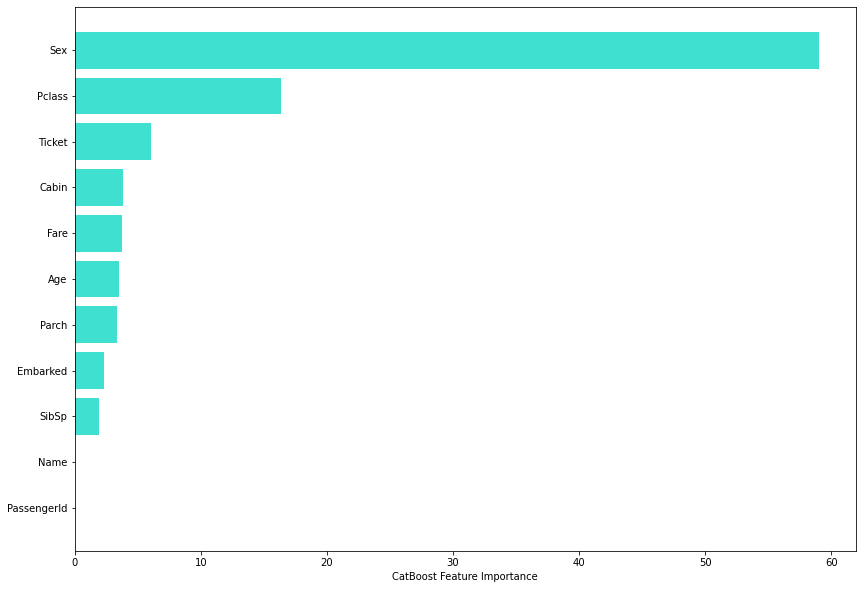

In [69]:
plot_feature_importances(model, train_pool, N_features=20)

Видим, что **`Sex`** и **`Pclass`** имеют наибольшее влияние на результат.

### Метрики оценки качества
CatBoost имеет метод `eval_metrics`, который позволяет вычислять заданные метрики для заданного набора данных. И отрисовать их конечно же.

In [70]:
model = CatBoostClassifier(iterations=50, random_seed=42, logging_level='Silent').fit(train_pool)
eval_metrics = model.eval_metrics(validate_pool, [metrics.AUC()], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [71]:
print(eval_metrics['AUC'][:6])

[0.8627368774106994, 0.8623176253563642, 0.8602213650846889, 0.8514170719436525, 0.8495723629045783, 0.8569092738554419]


### Сравнение процесса обучения

In [72]:
model1 = CatBoostClassifier(iterations=10, depth=1, train_dir='model_depth_1/', logging_level='Silent')
model1.fit(train_pool, eval_set=validate_pool)
model2 = CatBoostClassifier(iterations=10, depth=5, train_dir='model_depth_5/', logging_level='Silent')
model2.fit(train_pool, eval_set=validate_pool);

Код создал две новые папки с метриками: 'model_depth_1/' и 'model_depth_5/'.

In [73]:
from catboost import MetricVisualizer
widget = MetricVisualizer(['model_depth_1', 'model_depth_5'])
widget.start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### Сохранение модели

In [74]:
model = CatBoostClassifier(iterations=10, random_seed=42, logging_level='Silent').fit(train_pool)
model.save_model('catboost_model.cb')
model = CatBoostClassifier()
model.load_model('catboost_model.cb');

## Тюнинг параметров
Хотя вы всегда можете выбрать оптимальное количество итераций (шагов бустинга) с помощью перекрестной проверки, также важно поэкспериментировать с некоторыми параметрами модели. Посмотрим на `l2_leaf_reg` и `learning_rate`.

Выберем эти параметры с помощью пакета **`hyperopt`**.

In [75]:
!pip install hyperopt==0.2.5

In [76]:
import hyperopt

def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        eval_metric=metrics.Accuracy(),
        random_seed=42,
        verbose=False,
        loss_function=metrics.Logloss(),
    )
    
    cv_data = cv(
        Pool(X, y, cat_features=categorical_features_indices),
        model.get_params()
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])
    
    return 1 - best_accuracy # as hyperopt minimises

In [78]:
from numpy.random import RandomState

params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=10,
    trials=trials,
    rstate=RandomState(123)
)

print(best)

  0%|                                    | 0/10 [00:00<?, ?trial/s, best loss=?]Training on fold [0/3]


Custom logger is already specified. Specify more than one logger at same time is not thread safe.


bestTest = 0.8316498316
bestIteration = 7

Training on fold [1/3]

bestTest = 0.8451178451
bestIteration = 64

Training on fold [2/3]

bestTest = 0.8114478114
bestIteration = 96

 10%|▉        | 1/10 [00:03<00:33,  3.69s/trial, best loss: 0.18406285072951734]Training on fold [0/3]

bestTest = 0.8316498316
bestIteration = 3

Training on fold [1/3]

bestTest = 0.8451178451
bestIteration = 30

Training on fold [2/3]

bestTest = 0.797979798
bestIteration = 45

 20%|█▊       | 2/10 [00:07<00:30,  3.82s/trial, best loss: 0.18406285072951734]Training on fold [0/3]

bestTest = 0.8417508418
bestIteration = 32

Training on fold [1/3]

bestTest = 0.8653198653
bestIteration = 125

Training on fold [2/3]

bestTest = 0.8047138047
bestIteration = 348

 30%|███       | 3/10 [00:11<00:27,  3.89s/trial, best loss: 0.1717171717171717]Training on fold [0/3]

bestTest = 0.8249158249
bestIteration = 1

Training on fold [1/3]

bestTest = 0.8417508418
bestIteration = 14

Training on fold [2/3]

bestTest = 0.

Теперь давайте получим все данные перекрёстной проверки с лучшими параметрами:

In [79]:
best['l2_leaf_reg'], best['learning_rate']

(2.0, 0.1661030060980962)

In [80]:
model = CatBoostClassifier(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    iterations=500,
    eval_metric=metrics.Accuracy(),
    random_seed=42,
    verbose=False,
    loss_function=metrics.Logloss(),
)
cv_data = cv(Pool(X, y, cat_features=categorical_features_indices), model.get_params())

Training on fold [0/3]

bestTest = 0.835016835
bestIteration = 64

Training on fold [1/3]

bestTest = 0.8585858586
bestIteration = 55

Training on fold [2/3]

bestTest = 0.8148148148
bestIteration = 362



In [81]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

Precise validation accuracy score: 0.8305274971941637


Получилось немного улучшить скор.